# QAP - Brute Force vs. Random Search

Vamos a iniciar el experimento cargando algunos datos, en nuestro caso cargaremos la instancia <i>tai5a.dat</i>, que contiene los datos de una instancia de un QAP.

Explora el fichero antes de empezar a programar. ¿ Qué contenido contiene ?

In [1]:
import numpy as np

# Leemos datos del problema desde fichero

def read_instance_QAP(filepath : str) -> list:
    lines = open(filepath).readlines()
    
    # Leemos cabecera
    n = int(lines[0].strip().split()[0]) #Numero de lineas para definir las dos restricciones del problema: distancias y flujo de trabajo
    
    # Leemos D_ij
    D = [line.split() for line in lines[1:n+1]] #Distancias entre las fabricas
    D = np.array(D, dtype=float)

    # Leemos H_ij
    H = [line.split() for line in lines[n+1:]] #Flujo de trabajo entre fabricas
    H = np.array(H, dtype=float)
    
    return (n, D, H)

# Definimos función objetivo para evaluar candidatos
def objective_function_QAP(solution : list, instance : list) -> list:
    n, D, H = instance

    fitness = 0
    
    for i in range(len(solution)):
        for j in range(len(solution)):
            fitness += D[i][j] * H[solution[i]][solution[j]]
            
    return fitness


Analiza el código, intenta averiguar que cálculo computa.
Todavía nos falta algo, y es que...
¿ Cómo vamos a codificar una solución ?
¿ Cuál es el espacio de búsqueda ?
¿ Cuántos candidatos existen ?

 Diseña una codificación para el problema planteado y testealo con algunos ejemplos calculando su fitness.


In [2]:
solution = [0,2,3,4,1]

# Leemos instancia
instance = read_instance_QAP("tai5a.dat")

# Evaluación fitness
result = objective_function_QAP(solution, instance)

print("Objective value of the solution is {}".format(result))

Objective value of the solution is 29432.0


Ahora implementaremos una función para realizar una búsqueda exhaustiva mediante brute force.
Utiliza la instancia tai5a.dat y tai10a.dat.
¿ Cuál es la mejor solución y el fitness asociado ?
¿ Cuál es el tiempo de ejecución del algoritmo ?

In [4]:
import itertools as it
import math
import sys

# Brute force algorithm
def Brute_Force(instance : list) -> list:
    n, D, H = instance
    solutions = list(it.permutations(range(1,n)))     #Permutacion de todas las soluciones posibles
    min_fitness = np.inf
    
    for solution in solutions:
        fitness = objective_function_QAP(solution, instance)
        if (min_fitness > fitness):
            min_fitness = fitness
            best_solution = solution
    return min_fitness, best_solution

In [5]:
import time as tm

instance = read_instance_QAP("tai5a.dat")
start = tm.time()
(best, sol) = Brute_Force(instance)
end=tm.time()

print("Best fitness: {} solution: {}".format(best, sol))
print("Execution time: {}".format(end-start))

Best fitness: 5618.0 solution: (3, 4, 2, 1)
Execution time: 0.0005083084106445312


Eureka! Parece que el algoritmo es eficiente :)
Prueba ahora a ejecutar el algoritmo en la instancia <i>tai10a.dat</i> y <i>tai20a.dat</i>.

In [6]:
instance = read_instance_QAP("tai10a.dat")
start = tm.time()
(best, sol) = Brute_Force(instance)
end=tm.time()

print("Best fitness {} solution: {}".format(best, sol))
print("Execution time: {}".format(end-start))

Best fitness 114874.0 solution: (8, 3, 6, 4, 9, 1, 5, 2, 7)
Execution time: 7.119967699050903


In [6]:
instance = read_instance_QAP("tai20a.dat")
start = tm.time()
(best, sol) = Brute_Force(instance)
end=tm.time()

print("Best fitness {} Solution: {}".format(best, sol))
print("Execution time: {}".format(end-start))

: 

¿ Conclusión ?

> Un número alto de iteraciones hace que el programa colapse por lo que el algoritmo de Brute-Force solo debería usarse con una cantidad pequeña de soluciones posibles 

### Random Search

Esta claro que el algoritmo denominado <i>Brute-Force</i> no es aplicable en todos los escenarios, y va a ser necesario analizar el tamaño del espacio de búsqueda para hacernos una idea de si tiene sentido utilizarlo o no.

Un algoritmo algo más barato en el sentido computacional es random search, un método iterativo que va probando el espacio de búsqueda al azar. Muchas veces random search es utilizado como baseline para comparativas, ya que para demostrar la eficiencia de un algoritmo en primer lugar hay que demostrar que es mejor que un algoritmo basado en el azar. Random search explora un número determinado de soluciones al azar dentro del espacio de búsqueda.
Reutiliza tu implementación de brute-force para conseguir el algoritmo random search.

In [7]:
import random
import more_itertools as mit

def random_search(instance : list , num_solutions : int) -> list:
    n, D, H = instance
    solutions = [(mit.random_permutation(range(1,n))) for i in range(num_solutions)]     #Permutacion de algunas soluciones posibles (aleatorias)
    min_fitness = np.inf
    
    for solution in solutions:
        fitness = objective_function_QAP(solution, instance)
        if (min_fitness > fitness):
            min_fitness = fitness
            best_solution = solution
    return min_fitness, best_solution



In [11]:
# Cargar instancia
instance = read_instance_QAP("tai20a.dat")

# Ejecutar algoritmo random search
start = tm.time()
(fitness,sol) = random_search(instance,100)
end=tm.time()

print("Best fitness: {} Solution {}".format(fitness, sol))
print("Execution time: {}".format(end-start))

Best fitness: 792314.0 Solution (19, 12, 15, 1, 5, 6, 3, 18, 14, 8, 7, 10, 17, 2, 9, 4, 11, 16, 13)
Execution time: 0.03637838363647461


En este caso, está claro que la variable <i>n_solutions</i> es un hiperparámetro del modelo, y que cuanto más grande sea se explorará una mayor parte del espacio de búsqueda y que mejor serán las soluciones, aunque ...
¿ Qué pasaría si hacemos n_solutions extremadamente grande ?

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

list_n_solutions = []
list_best_fitness = []
list_times = []
repetitions = 10

# Experimenta con distintos hiperparametros: 10, 100, 1000, 10000...

n_solutions = 1000000
avg_fitness = 0
avg_time = 0

start = tm.time()
(fitness, solution) = random_search(instance, n_solutions)
delta = tm.time() - start
avg_fitness += fitness
avg_time += delta

print("N-solutions: {}. Average fitness: {}. Average time: {}".format(n_solutions, avg_fitness, avg_time))
list_n_solutions.append(n_solutions)
list_best_fitness.append(avg_fitness)
list_times.append(avg_time)


N-solutions: 1000000. Average fitness: 733504.0. Average time: 84.51187992095947


In [61]:
# Creamos un dataframe
datos = pd.DataFrame({"n_solutions" : list_n_solutions,
                      "Fitness" : list_best_fitness,
                      "Delta time" : list_times})
datos.size
datos.head()

,n_solutions,Fitness,Delta time
0,10,157756.8,0.000960
1,100,146022.2,0.009585
2,1000,139121.0,0.027836
3,10000,133924.8,0.229948
4,100000,129420.6,2.369893


In [62]:
datos.set_index('n_solutions', inplace = True)
datos.head()

,Fitness,Delta time
n_solutions,,
10,157756.8,0.000960
100,146022.2,0.009585
1000,139121.0,0.027836
10000,133924.8,0.229948
100000,129420.6,2.369893


<AxesSubplot:xlabel='n_solutions'>

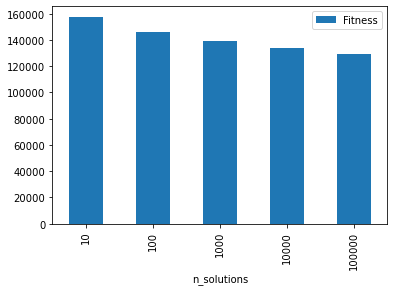

In [63]:
%matplotlib inline
datos.plot(kind = 'bar', y = 'Fitness', use_index = True)

<AxesSubplot:xlabel='n_solutions'>

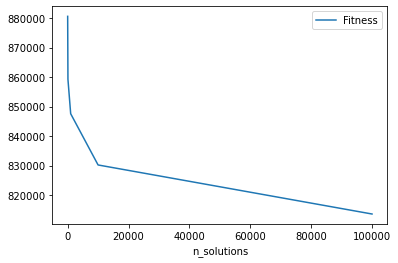

In [56]:
%matplotlib inline
datos.plot(kind = 'line', y = 'Fitness', use_index = True)

<AxesSubplot:xlabel='n_solutions'>

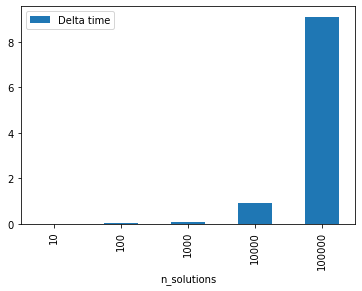

In [57]:
%matplotlib inline
datos.plot(kind = 'bar', y = 'Delta time', use_index = True)

<AxesSubplot:xlabel='n_solutions'>

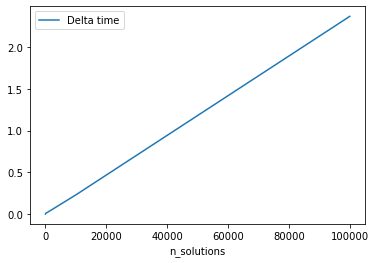

In [64]:
%matplotlib inline
datos.plot(kind = 'line', y = 'Delta time', use_index = True)